In [1]:
import json
import os
import random
from PIL import Image
from pycocotools import mask as maskUtils
import matplotlib.pyplot as plt
import numpy as np

import panoptic_parts as pp
from panoptic_parts.utils.visualization import set_use_legacy_cpp_parts_colormap
set_use_legacy_cpp_parts_colormap(False)


In [75]:
spec.sid_pid2scene_class_part_class

{0: ('UNLABELED', 'UNLABELED'),
 1: ('aeroplane', 'UNLABELED'),
 101: ('aeroplane', 'body'),
 102: ('aeroplane', 'stern'),
 103: ('aeroplane', 'lwing'),
 104: ('aeroplane', 'rwing'),
 105: ('aeroplane', 'tail'),
 106: ('aeroplane', 'engine'),
 107: ('aeroplane', 'wheel'),
 2: ('bicycle', 'UNLABELED'),
 201: ('bicycle', 'fwheel'),
 202: ('bicycle', 'bwheel'),
 203: ('bicycle', 'saddle'),
 204: ('bicycle', 'handlebar'),
 205: ('bicycle', 'chainwheel'),
 206: ('bicycle', 'headlight'),
 3: ('bird', 'UNLABELED'),
 301: ('bird', 'head'),
 302: ('bird', 'leye'),
 303: ('bird', 'reye'),
 304: ('bird', 'beak'),
 305: ('bird', 'torso'),
 306: ('bird', 'neck'),
 307: ('bird', 'lwing'),
 308: ('bird', 'rwing'),
 309: ('bird', 'lleg'),
 310: ('bird', 'lfoot'),
 311: ('bird', 'rleg'),
 312: ('bird', 'rfoot'),
 313: ('bird', 'tail'),
 4: ('boat', 'UNLABELED'),
 5: ('bottle', 'UNLABELED'),
 501: ('bottle', 'cap'),
 502: ('bottle', 'body'),
 6: ('bus', 'UNLABELED'),
 601: ('bus', 'frontside'),
 602: ('

In [73]:
len(spec.sid_pid2scene_class_part_class)

294

In [11]:
label

'/data/pascal_panoptic_parts/labels/validation/2008_001723.tif'

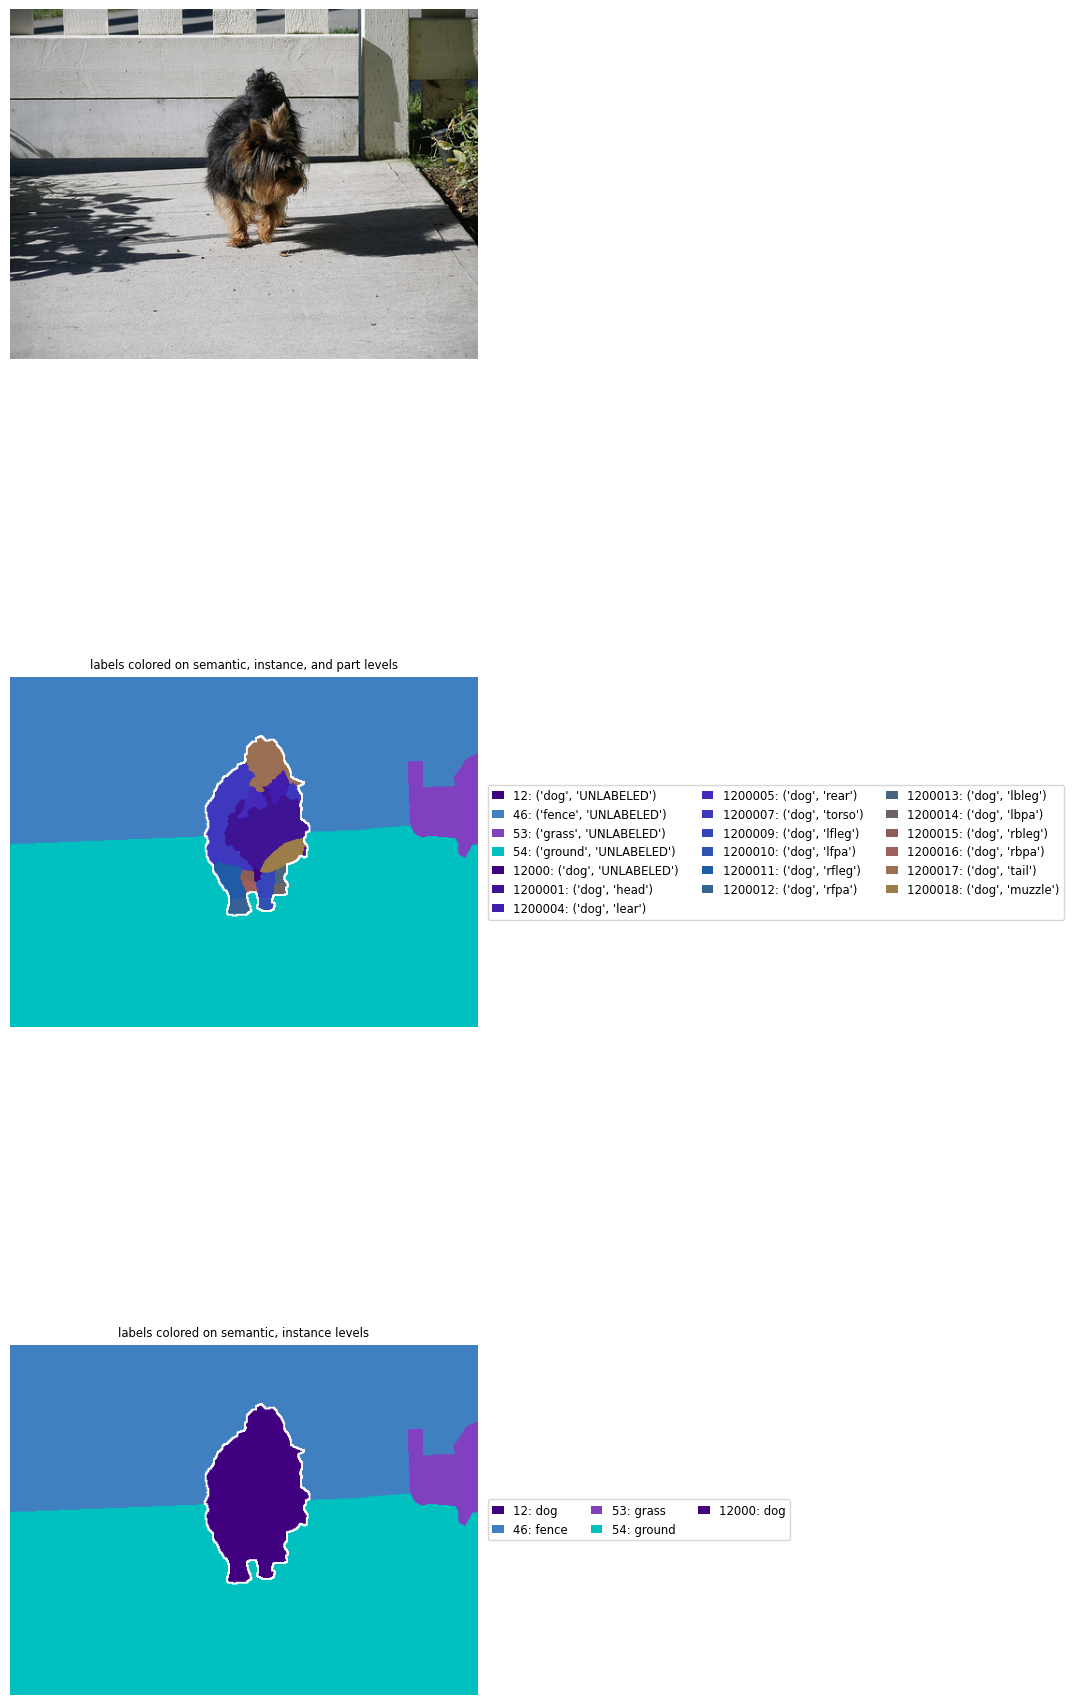

In [90]:
from panoptic_parts import encode_ids, decode_uids
from panoptic_parts.visualization.visualize_label_with_legend import experimental_colorize_label

img_path = "/data/VOCdevkit/VOC2012/JPEGImages"

label_path = "/data/pascal_panoptic_parts/labels/validation"
spec = pp.specs.dataset_spec.DatasetSpec("ppp_spec.yaml")

label_files = os.listdir(label_path)
label_file = random.choice(label_files)

img_file = os.path.join(img_path, label_file.replace('.tif','.jpg'))
img = Image.open(img_file)

# for label in labels:
label_file_full = os.path.join(label_path, label_file)
uids = np.array(Image.open(label_file_full), dtype=np.int32)
uids = encode_ids(*decode_uids(uids, experimental_dataset_spec=spec, experimental_correct_range=True))

uids_sem_inst_parts_colored, uids_sem_inst_colored, uid2color_dct = experimental_colorize_label(
    uids, sid2color=spec.sid2scene_color, emphasize_instance_boundaries=True,  return_uid2color=True, return_sem_inst=True,
    experimental_deltas=(60, 60, 60), experimental_alpha=0.5)

# plot
_, axes = plt.subplots(3, 1, figsize=(10, 20))
ax0, ax1, ax2 = axes

# generate legend, h is a hidden rectangle just to create a legend entry
handles = []
handles_text = []
uids_unique = np.unique(uids)
for uid in uids_unique:
    h = plt.Rectangle((0, 0), 1, 1, fc=list(map(lambda x: x/255, uid2color_dct[uid])))
    handles.append(h)
    _, _, _, sid_pid = decode_uids(uid, return_sids_pids=True)
    scene_class_part_class = spec.scene_class_part_class_from_sid_pid(sid_pid)
    handles_text.append(f'{uid}: {scene_class_part_class}')

ax0.imshow(img)
ax1.imshow(uids_sem_inst_parts_colored)
ax1.set_title('labels colored on semantic, instance, and part levels', fontsize='small')
ax1.legend(handles, handles_text, ncol=3, fontsize='small', handlelength=1.0,
          loc='center left', bbox_to_anchor=(1.01, 0.5))


handles = []
handles_text = []
all_sid_iids = set()
for uid in uids_unique:
    sid, _, _, sid_iid = decode_uids(uid, return_sids_iids=True)
    if str(sid_iid) in all_sid_iids:
        continue
    all_sid_iids.add(str(sid_iid))
    h = plt.Rectangle((0, 0), 1, 1, fc=list(map(lambda x: x/255, uid2color_dct[uid])))
    handles.append(h)
    scene_class = spec.scene_class_from_sid(sid)
    handles_text.append(f'{sid_iid}: {scene_class}')

ax2.imshow(uids_sem_inst_colored)
ax2.set_title('labels colored on semantic, instance levels', fontsize='small')
ax2.legend(handles, handles_text, ncol=3, fontsize='small', handlelength=1.0,
          loc='center left', bbox_to_anchor=(1.01, 0.5))
#plt.show()
ax0.axis('off')
ax1.axis('off')
ax2.axis('off')
plt.tight_layout()


In [41]:
uids_sem_inst_colored.shape

(333, 500, 3)

In [46]:
color

0

3000 3 0 -1


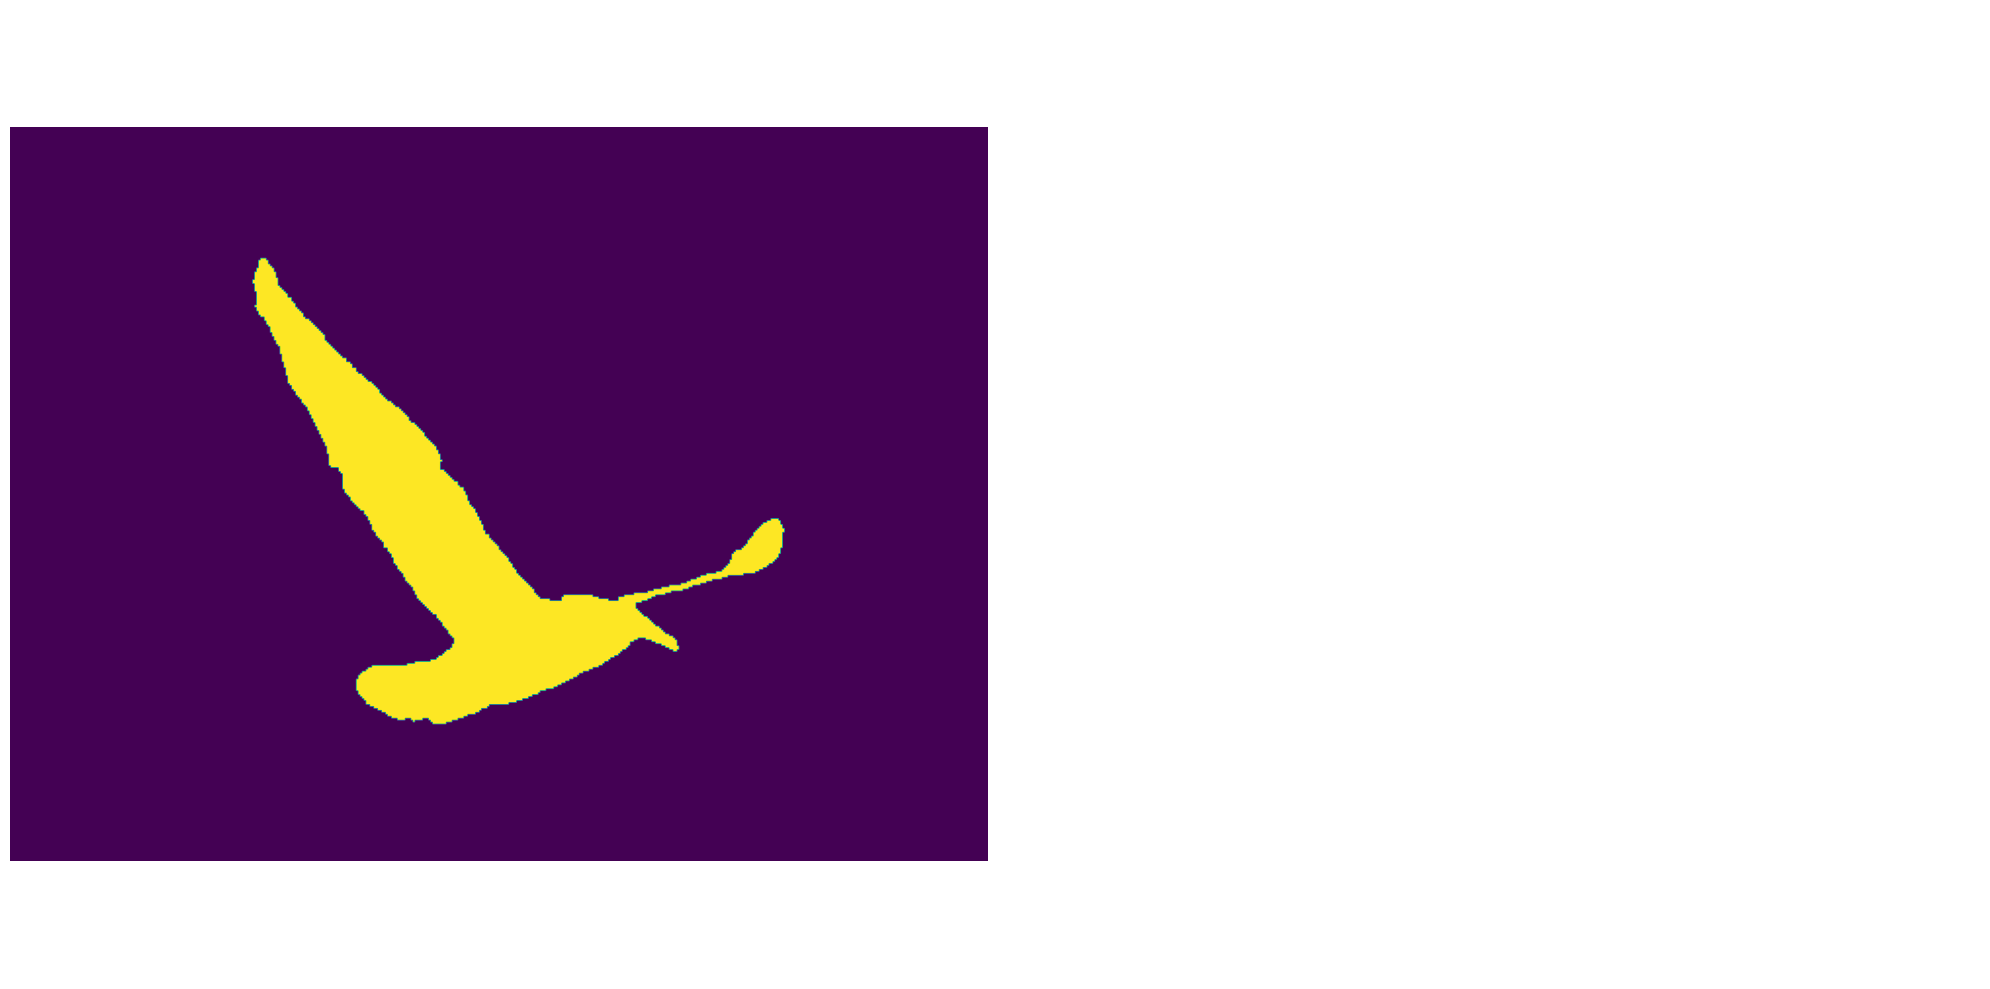

In [87]:
uid = uids_unique[2]
color = uid2color_dct[uid]
sid, iid, pid = decode_uids(uid)
print(uid, sid, iid, pid)

unique_colors = np.unique(uids_sem_inst_colored.reshape(-1, 3), axis=0)
# find a mask where the color is present
mask_0 = np.all(uids_sem_inst_colored == color, axis=-1)
# mask_1 = np.all(uids_sem_inst_colored == unique_colors[1], axis=-1)
# plot
_, axes = plt.subplots(1, 2, figsize=(20, 10))
ax0, ax1 = axes

ax0.imshow(mask_0.astype(np.uint8))
# ax1.imshow(mask_1.astype(np.uint8))

ax0.axis('off')
ax1.axis('off')
plt.tight_layout()
plt.show()